In [1]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/co2-emissions/dataset.csv'
data = pd.read_csv(file_path)

# Display basic information about the data
basic_info = data.info()
basic_info

# Display the first few rows of the data
data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135408 entries, 0 to 135407
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    135408 non-null  object 
 1   date       135408 non-null  object 
 2   sector     135408 non-null  object 
 3   value      135408 non-null  float64
 4   timestamp  135408 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 5.2+ MB


,country,date,sector,value,timestamp
0,Brazil,01/01/2019,Power,0.096799,1546300800
1,China,01/01/2019,Power,14.816100,1546300800
2,EU27 & UK,01/01/2019,Power,1.886490,1546300800
3,France,01/01/2019,Power,0.051217,1546300800
4,Germany,01/01/2019,Power,0.315002,1546300800


In [2]:
# Checking for missing values and duplicate entries
missing_values = data.isnull().sum()
duplicate_rows = data.duplicated().sum()

# Convert 'date' column to datetime format for better analysis
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

# Check the unique values and potentially inconsistent entries in 'country' and 'sector' columns
unique_countries = data['country'].unique()
unique_sectors = data['sector'].unique()

missing_values, duplicate_rows, unique_countries, unique_sectors


(country      0
 date         0
 sector       0
 value        0
 timestamp    0
 dtype: int64,
 0,
 array(['Brazil', 'China', 'EU27 & UK', 'France', 'Germany', 'India',
        'Italy', 'Japan', 'ROW', 'Russia', 'Spain', 'UK', 'US', 'WORLD'],
       dtype=object),
 array(['Power', 'Industry', 'Ground Transport', 'Residential',
        'Domestic Aviation', 'International Aviation'], dtype=object))

Basic Trend Analysis showing how CO2 emissions changed over time in each country? Are there any noticeable trends or patterns?****

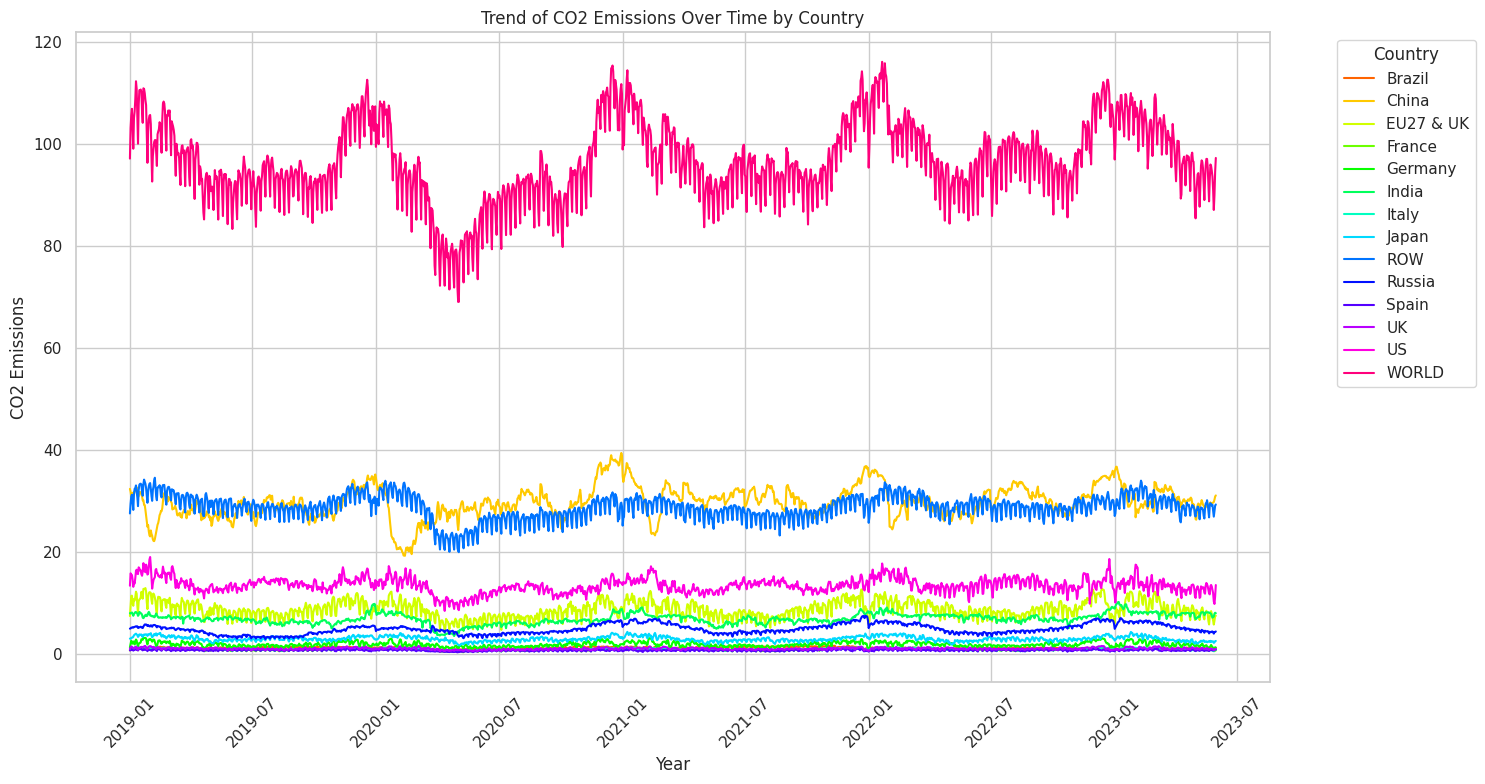

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Grouping data by country and date and summing up the CO2 values
grouped_data = data.groupby(['country', 'date']).agg({'value': 'sum'}).reset_index()

# Plotting the trends of CO2 emissions over time for each country
plt.figure(figsize=(15, 8))

# Ensuring each country has a different color
countries = grouped_data['country'].unique()
palette = sns.color_palette("hsv", len(countries))

sns.lineplot(x='date', y='value', hue='country', palette=palette, data=grouped_data)
plt.title('Trend of CO2 Emissions Over Time by Country')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Sectors that contribute the most to CO2 emissions in each country, and how did that vary across different countries?

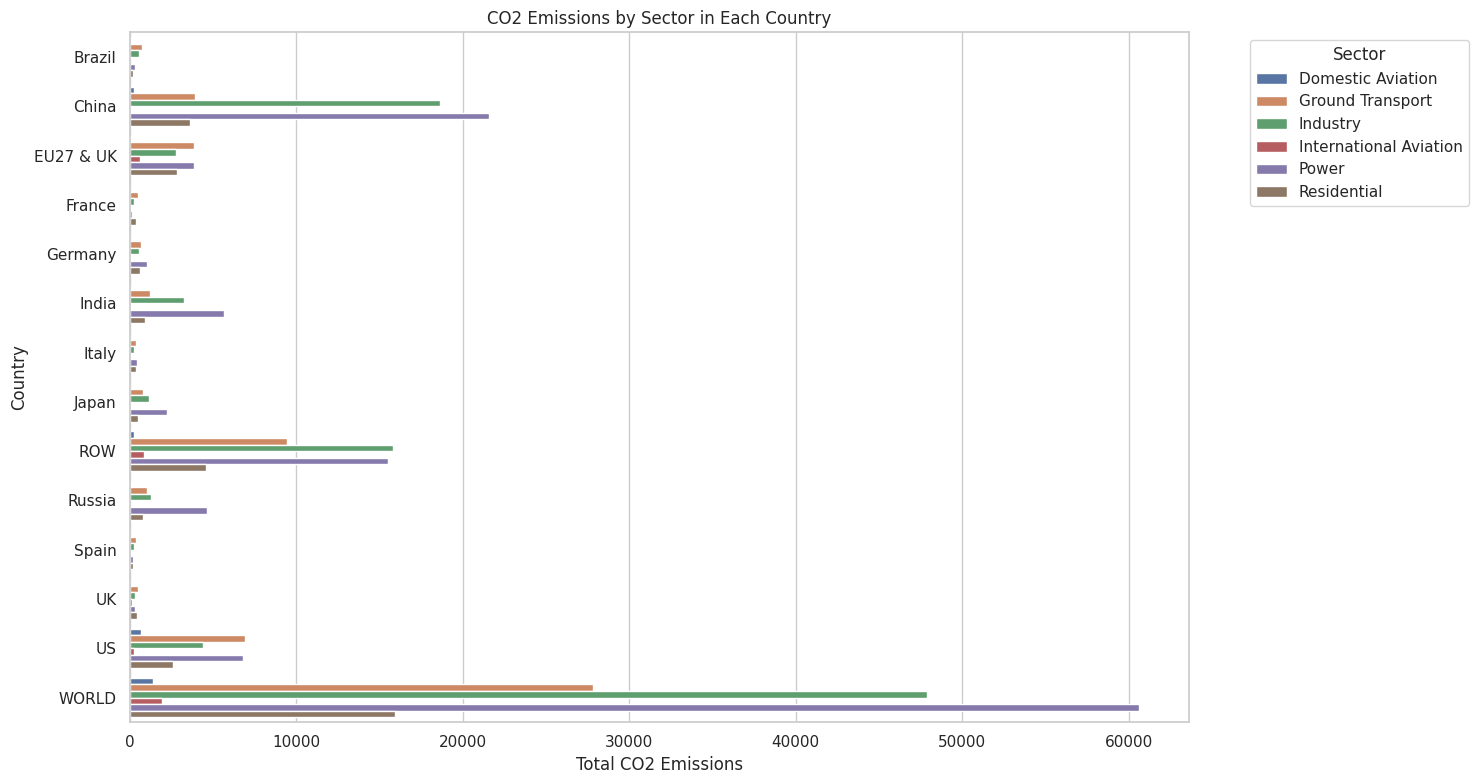

In [4]:
# Grouping data by country and sector to sum up CO2 emissions
sectorwise_emissions = data.groupby(['country', 'sector']).agg({'value': 'sum'}).reset_index()

# Plotting CO2 emissions by sector for each country
plt.figure(figsize=(15, 8))

sns.barplot(x='value', y='country', hue='sector', data=sectorwise_emissions)
plt.title('CO2 Emissions by Sector in Each Country')
plt.xlabel('Total CO2 Emissions')
plt.ylabel('Country')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Heatmap to provide a clearer and more detailed visualization of the CO2 emissions by sector in each country.

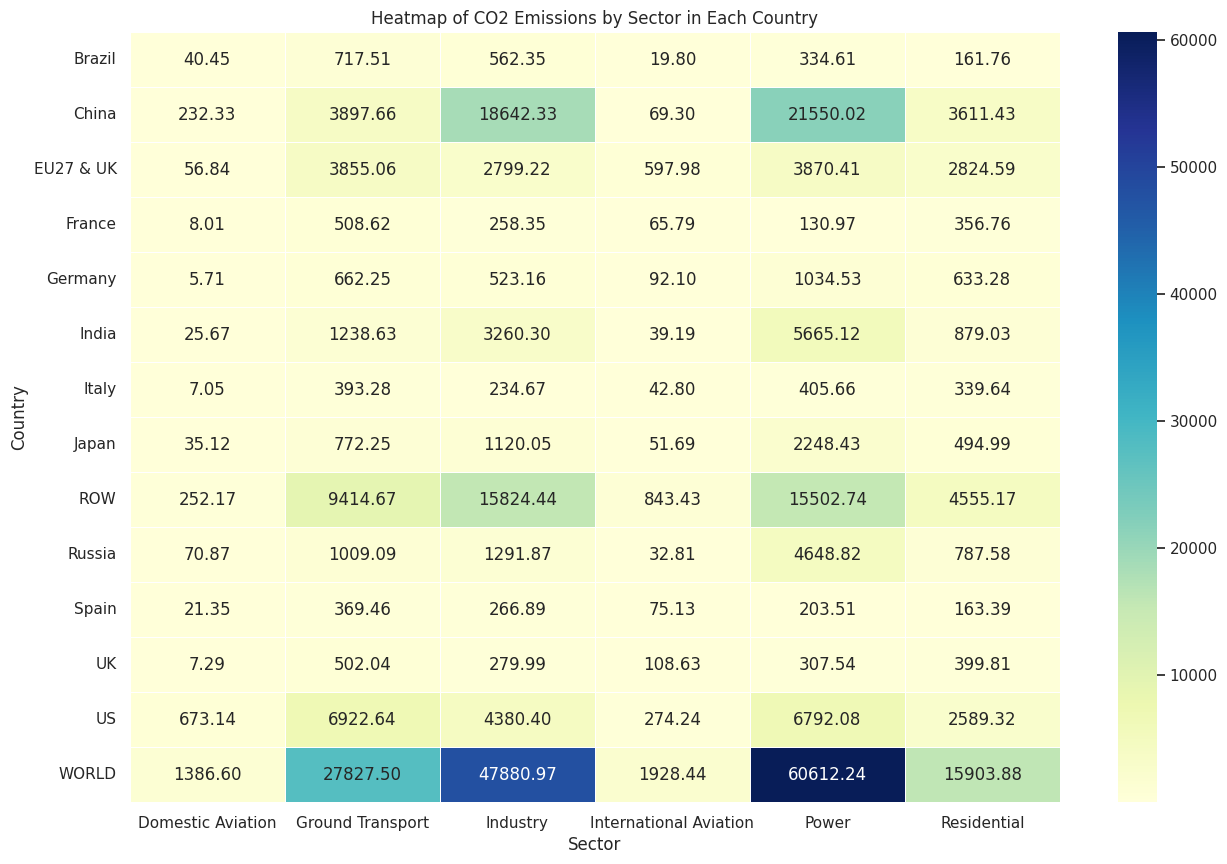

In [5]:
# Creating a pivot table for a better visualization
pivot_data = sectorwise_emissions.pivot(index='country', columns='sector', values='value')

# Plotting the pivot data
plt.figure(figsize=(15, 10))

sns.heatmap(pivot_data, annot=True, fmt=".2f", linewidths=.5, cmap='YlGnBu')
plt.title('Heatmap of CO2 Emissions by Sector in Each Country')
plt.xlabel('Sector')
plt.ylabel('Country')

plt.show()